# Project: Medical Cost Predication
## Objective
### Goal: 
Predict an individual’s medical insurance cost (charges) using their demographic features.
### Real-World Application: 
Insurance companies can estimate premiums for customers based on health factors and risk attributes,
while individuals can learn how personal factors (e.g., smoking, BMI, age) affect insurance costs.
### Method: 
Since the objective is to determine the relationship between a number of factors(features) and cost(target), it would be a Supervised Learning problem. We would apply Multiple Linear Regression.
### Dataset:
The dataset1 contains:
- age: Age of primary beneficiary.
- sex: Gender of the beneficiary (male/female).
- bmi: Body mass index.
- children: Number of children/dependents covered by insurance.
- smoker: Smoking behavior (yes/no).
- region: The beneficiary’s residential area in the US (northeast, southeast, southwest, northwest).
- charges: Individual medical costs billed by health insurance.

In [13]:
import pandas as pd

## Data Collection and Loading

In [14]:
# Load the dataset
data = pd.read_csv("insurance.csv")

# First few rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

In [15]:
# Quick Glance at the Data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# Checking for Missing Values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

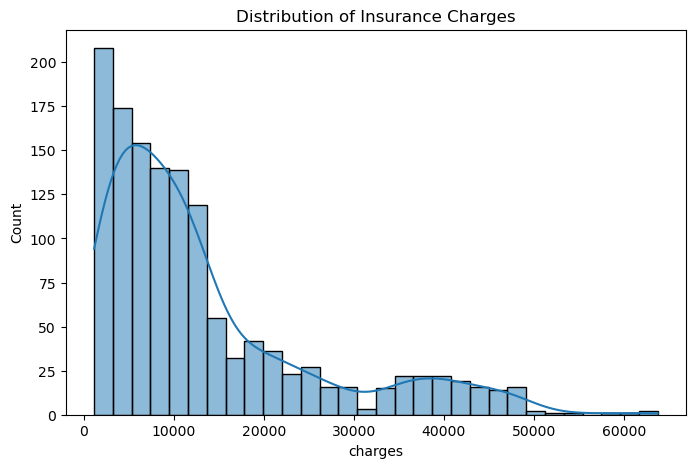

In [17]:
# Distribution of the Target (Charges)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

#### Key Points:
Distribution of Target
Medical charges are often right-skewed, reflecting some individuals with very high costs.

## Data Preprocessing

### Encoding Categorical Variables
- sex and smoker are binary (male/female, yes/no).
- region has four categories (nominal).

In [18]:
# 1. Encoding 'sex' and 'smoker' using map
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [19]:
# 2. One-Hot Encoding 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


#### Key Points:
This results in:
- sex: 1 for male, 0 for female
- smoker: 1 for smoker, 0 for non-smoker
- region_northwest, region_southeast, region_southwest (assuming region_northeast was dropped).

### Feature and Target Separation

In [20]:
X = data.drop('charges', axis=1)
y = data['charges']

### Correlation Analysis

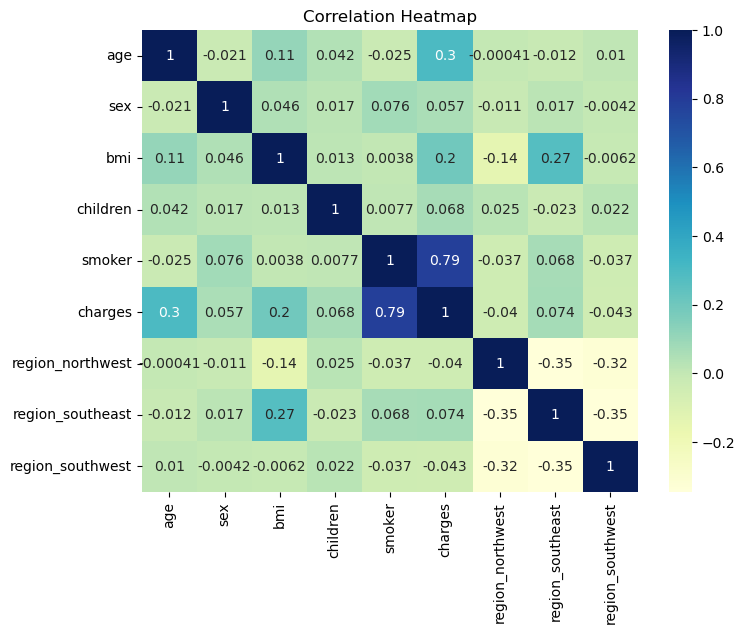

In [21]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

#### Key Points:
Smoker, age, and BMI often show strong correlations with charges.